In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

In [102]:
class Machine:
    def __init__(self, name, operations):
        self.operations = operations
        self.name = name
    
class Operation:
    
    def __init__(self, name, duration, machine_name):
        self.name = name
        self.duration = duration
        self.machine_name = machine_name
        
class Job:
    def __init__(self, number, name, operations):
        self.number = number
        self.name = name
        self.operations = operations
        

In [103]:
j1 = Job(0, 'j0', [ Operation('o11',10, 'm1'), 
                Operation('o12',15, 'm2'),
                Operation('o13',10, 'm3'),
                Operation('o14',20, 'm1'),
                Operation('o15',15, 'm3')
               ])

j2 = Job(1, 'j1', [ Operation('o21',10, 'm3'), 
                Operation('o22',20, 'm1'),
                Operation('o23',20, 'm3'),
                Operation('o24',10, 'm1')
               ])

j3 = Job(2, 'j2', [ Operation('o31',15, 'm2'), 
                Operation('o32',10, 'm3'),
               ])

j4 = Job(3, 'j3', [ Operation('o11',10, 'm4'), 
                Operation('o12',30, 'm2'),
                Operation('o13',10, 'm3'),
                Operation('o14',5, 'm2'),
                Operation('o15',15, 'm1')
               ])

j5 = Job(4, 'j4', [ Operation('o11', 25, 'm1'), 
                Operation('o12',10, 'm4'),
                Operation('o13',20, 'm2'),
                Operation('o14',5, 'm3'),
                Operation('o15',30, 'm1'),
                Operation('o15',15, 'm4')
               ])

jobs = [j1, j2, j3, j4, j5]
n = len(jobs)
m = 4

In [104]:
def init_population(jobs, population_size):
    
    chromosome = []
    chromosomes = []
    
    for job in jobs:
        for operation in job.operations:
            chromosome.append(job.number)
    
    for i in range(population_size):
        c = chromosome.copy()
        random.shuffle(c)
        chromosomes.append(c)
        
    return chromosomes
        
    
#     first = 0
#     population = []
#     for first_job in range(0, len(jobs)):
#         solution = []
#         for j in range(first_job, len(jobs)):
#             for operation in jobs[j].operations:
#                 solution.append(jobs[j].number)
#         for j in range(0, first_job):
#             for operation in jobs[j].operations:
#                 solution.append(jobs[j].number)
#         population.append(solution)
#     return population


# print(init_population())
# population = init_population()


def cost_function(chromosome):
    
    machines_time = {
    }

    machines_operations = {
    }

    for i in range(m):
        machines_time[f'm{i+1}'] = 0
        machines_operations[f'm{i+1}'] = []

    jobs_time_passed = n * [0]

    operation_counter = n * [0]
    
    for i in range(len(chromosome)):
        job_index = chromosome[i]
        job = jobs[job_index]
        operation = job.operations[operation_counter[job_index]]
        machine_name = operation.machine_name
        
        #dodajemo prazno ako je masina radila krace od trajanja posla do te operacije
        if machines_time[machine_name] < jobs_time_passed[job_index]:
            diff = jobs_time_passed[job_index] - machines_time[machine_name]
            machines_operations[machine_name].append(Operation('blank', diff, machine_name))
            machines_time[machine_name] += diff
            
            
        machines_operations[machine_name].append(operation)
        machines_time[operation.machine_name] += operation.duration
        jobs_time_passed[job_index] = machines_time[machine_name]
        
        operation_counter[job_index] += 1
    
    return max(machines_time.values())
    

def sort_parents(population):
    
    costs = []
    
    for i in range(len(population)):
        costs.append(cost_function(population[i]))
    
    ranked = sorted( list(zip(population,costs)), key = lambda c:c[1])
    
    return list(zip(*ranked))
    
def roulette_selection(parents):
    
    pairs = []
    
    for i in range(0, len(parents), 2):
        
        weights = []
        
        for i in range(len(parents)):
            weights.append((len(parents)-i)*random.random())
        
        if (weights[0]>=weights[1]):
            maxInd1=0
            maxInd2=1
        else:
            maxInd1=1
            maxInd2=0
    
        for i in range(2,len(parents)):
            if weights[i]>weights[maxInd1]:
                maxInd2=maxInd1
                maxInd1=i
            elif weights[i]>weights[maxInd2]:
                maxInd2=1

        pairs.append([parents[maxInd1], parents[maxInd2]])
      
    return pairs
    

In [105]:
init_population(jobs, 30)

[[2, 0, 1, 4, 3, 1, 4, 3, 0, 0, 4, 0, 3, 0, 1, 4, 3, 1, 4, 2, 4, 3],
 [4, 0, 1, 4, 4, 0, 3, 1, 0, 1, 4, 3, 3, 3, 4, 3, 2, 2, 0, 4, 0, 1],
 [1, 4, 4, 4, 3, 4, 4, 2, 0, 0, 0, 2, 3, 1, 0, 3, 4, 0, 1, 1, 3, 3],
 [3, 3, 4, 1, 3, 0, 2, 1, 4, 4, 1, 4, 0, 3, 3, 4, 4, 0, 0, 1, 0, 2],
 [0, 1, 3, 1, 4, 2, 4, 3, 0, 0, 0, 2, 1, 3, 3, 0, 4, 4, 3, 1, 4, 4],
 [3, 3, 1, 0, 0, 2, 4, 1, 1, 4, 0, 1, 4, 0, 3, 2, 3, 0, 3, 4, 4, 4],
 [4, 3, 4, 3, 3, 3, 4, 1, 4, 0, 0, 2, 3, 0, 4, 1, 0, 1, 0, 2, 4, 1],
 [3, 1, 2, 3, 4, 4, 0, 2, 1, 0, 0, 4, 3, 3, 4, 4, 0, 4, 3, 0, 1, 1],
 [0, 1, 3, 4, 3, 1, 4, 1, 0, 2, 0, 4, 0, 3, 1, 4, 2, 0, 3, 3, 4, 4],
 [0, 4, 3, 3, 2, 4, 1, 0, 0, 0, 4, 1, 1, 3, 0, 3, 1, 4, 4, 3, 4, 2],
 [0, 3, 4, 4, 0, 1, 3, 0, 0, 1, 2, 4, 4, 3, 3, 2, 4, 3, 0, 1, 1, 4],
 [1, 4, 4, 1, 0, 0, 4, 3, 3, 4, 0, 4, 0, 2, 1, 0, 1, 3, 3, 4, 2, 3],
 [4, 0, 4, 3, 3, 0, 2, 1, 3, 3, 4, 1, 4, 0, 1, 0, 3, 1, 4, 4, 2, 0],
 [4, 4, 4, 2, 4, 0, 3, 2, 4, 1, 0, 3, 0, 1, 3, 1, 1, 0, 4, 3, 0, 3],
 [0, 2, 3, 4, 1, 1, 3, 0, 0, 0, 4,

In [106]:
def crossover(pairs):
    
    children = []
    size = len((pairs[0])[0])
    for y in pairs:
        
        new_solution = y[0][0:math.ceil(size/2)]
        
        y2 = y[1].copy()
        
        for i in new_solution:
            if i in y2: 
                y2.remove(i)
     
        new_solution = new_solution + y2

        children.append(new_solution)
        
        new_solution1 = y[1][0:math.ceil(size/2)]
        
        y1 = y[0].copy()
        
        for i in new_solution1:
            if i in y1: 
                y1.remove(i)
     
        new_solution1 = new_solution1 + y1

        children.append(new_solution1)
        
    return children

In [107]:
def mutation(chromosomes, mutation_rate):
    mutated_chromosomes = []
    size = len(chromosomes[0])
    for chromosome in chromosomes:
        chromosome_mutated = chromosome.copy()
        if random.random() < mutation_rate:
            first_index = random.randint(0, size-1)
            second_index = random.randint(0, size-1)
            while first_index == second_index:
                second_index = random.randint(0, size-1)
                
            chromosome_mutated[first_index], chromosome_mutated[second_index] = chromosome_mutated[second_index], chromosome_mutated[first_index]
            
        mutated_chromosomes.append(chromosome_mutated) 
            
    return mutated_chromosomes

def elitism(chromosomes_old, chromosomes_new, elitis_rate, population_size):
    old_ind_size = int(np.round(population_size*elitis_rate))
    return chromosomes_old[:old_ind_size] + chromosomes_new[:(population_size-old_ind_size)]

In [108]:
def jss(max_iter, jobs, mutation_rate, elitism_rate, population_size):
    chromosomes = init_population(jobs, population_size)
    init_ranked_parents, init_costs = sort_parents(chromosomes)
    for i in range(max_iter):
        ranked_parents, costs = sort_parents(chromosomes)
        pairs = roulette_selection(ranked_parents)
        children = crossover(pairs)
        chromosomes = mutation(children, mutation_rate)
        ranked_children, costs = sort_parents(chromosomes)
        chromosomes = elitism(ranked_parents, ranked_children, elitism_rate, population_size)
    final_ranked_parents, final_costs = sort_parents(chromosomes)
    return init_ranked_parents, init_costs, final_ranked_parents, final_costs

In [114]:
def start(population_size, generations, mutation_rate, elitism_rate, iterations):
    init_best_costs = []
    final_best_costs = []
    for i in range(iterations):
        init_ranked_parents, init_costs, final_ranked_parents, final_costs = jss(generations, jobs, mutation_rate, elitism_rate, population_size)
        init_best_costs.append(init_costs[0])
        final_best_costs.append(final_costs[0])

    optimal = min(final_best_costs)
    optimal_count = final_best_costs.count(optimal)
    print('Optimalno vreme:', optimal, ', Procenat od ukupnog broja iteracija: ', optimal_count/iterations * 100, '%')
    plt.plot(init_best_costs)
    plt.plot(final_best_costs)
    plt.legend(['init', 'final'])
    plt.title('Pocetna i zavrsna najbolja resenja kroz 50 iteracija')
    plt.xlabel('Iteracije')
    plt.ylabel('Trajanje')

Optimalno vreme: 130 , Procenat od ukupnog broja iteracija:  38.0 %
Vreme:  0.45 s


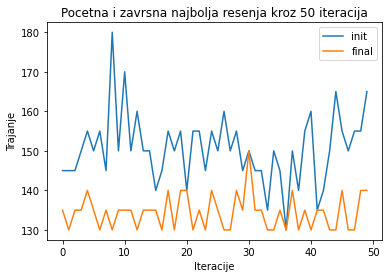

In [119]:
generations = 15
mutation_rate = 0.9
elitism_rate = 0.1
population_size = 10
iterations = 50

start_time = time.time()
start(population_size, generations, mutation_rate, elitism_rate, iterations)
end_time = time.time()
print('Vreme: ', round(end_time - start_time, 2), 's')

Optimalno vreme: 130 , Procenat od ukupnog broja iteracija:  82.0 %
Vreme:  4.01 s


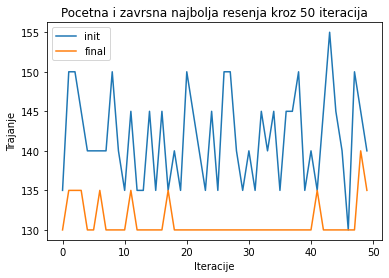

In [118]:
generations = 50
mutation_rate = 0.9
elitism_rate = 0.1
population_size = 30
iterations = 50

start_time = time.time()
start(population_size, generations, mutation_rate, elitism_rate, iterations)
end_time = time.time()
print('Vreme: ', round(end_time - start_time, 2), 's')